In [2]:
# Imports
# 
# Note: these are all the imports you need for this assignment!
# Do not import any other functions / packages

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('display.precision', 2)

In [4]:
'''
Part 1 - Data Wrangling
For this assignment, you are provided with two data files that contain information on a sample of people. 
The two files and their columns are:

age_steps.csv: Contains one row for each person.

id: Unique identifier for the person.

age: Age of the person.

steps: Number of steps the person took on average in January 2018.

incomes.json: Contains one record for each person.

id: Unique identifier for the person. Two records with the same ID between age_steps.csv and incomes.json 
correspond to the same person.

last_name: Last name of the person.

first_name: First name of the person.

income: Income of the person in 2018.

For part 1 and 2 of the assignment, we recommend looking at the official 10 minutes to pandas guide: 
http://pandas.pydata.org/pandas-docs/stable/10min.html

Question 1a: Load the age_steps.csv file into a pandas DataFrame named df_steps. It should have 11257 rows and 3 columns.
'''

'\nPart 1 - Data Wrangling\nFor this assignment, you are provided with two data files that contain information on a sample of people. \nThe two files and their columns are:\n\nage_steps.csv: Contains one row for each person.\n\nid: Unique identifier for the person.\n\nage: Age of the person.\n\nsteps: Number of steps the person took on average in January 2018.\n\nincomes.json: Contains one record for each person.\n\nid: Unique identifier for the person. Two records with the same ID between age_steps.csv and incomes.json \ncorrespond to the same person.\n\nlast_name: Last name of the person.\n\nfirst_name: First name of the person.\n\nincome: Income of the person in 2018.\n\nFor part 1 and 2 of the assignment, we recommend looking at the official 10 minutes to pandas guide: \nhttp://pandas.pydata.org/pandas-docs/stable/10min.html\n\nQuestion 1a: Load the age_steps.csv file into a pandas DataFrame named df_steps. It should have 11257 rows and 3 columns.\n'

In [5]:
df_steps = pd.read_csv('age_steps.csv')

In [6]:
df_steps.describe

<bound method NDFrame.describe of           id  age  steps
0      18875   31   9159
1      36859   48   6764
2      99794   39   4308
...      ...  ...    ...
11254  52336   41     -1
11255  54972   44   7548
11256  17411   43   8765

[11257 rows x 3 columns]>

In [7]:
assert isinstance(df_steps, pd.DataFrame)
assert df_steps.shape == (11257, 3)

In [8]:
'''
Question 1b: Load the incomes.json file into a pandas DataFrame called df_income. 
The DataFrame should have 13332 rows and 4 columns.

Hint: Find a pandas function similar to read_csv for JSON files.
'''

'\nQuestion 1b: Load the incomes.json file into a pandas DataFrame called df_income. \nThe DataFrame should have 13332 rows and 4 columns.\n\nHint: Find a pandas function similar to read_csv for JSON files.\n'

In [9]:
df_income = pd.read_json('incomes.json')

In [10]:
df_income.describe

<bound method NDFrame.describe of           id last_name first_name    income
0      84764     Wolfe      Brian  99807.16
1      49337     Keith     George      0.00
2      54204    Wilcox    Zachary   5242.96
...      ...       ...        ...       ...
13329  68473     Meyer        Ian   7617.27
13330  60486   Russell       Carl  34479.99
13331  13915   Johnson     Curtis  12133.79

[13332 rows x 4 columns]>

In [11]:
assert isinstance(df_income, pd.DataFrame)
assert df_income.shape == (13332, 4)

In [12]:
'''
Question 1c: Drop the first_name and last_name columns from the df_income DataFrame. 
The resulting DataFrame should only have two columns.
'''

'\nQuestion 1c: Drop the first_name and last_name columns from the df_income DataFrame. \nThe resulting DataFrame should only have two columns.\n'

In [13]:
df_income = df_income[['id', 'income']]

In [14]:
assert 'first_name' not in df_income.columns
assert 'last_name' not in df_income.columns

In [15]:
'''
Question 1d: Merge the df_steps and df_income DataFrames into a single combined DataFrame called df. 
Use the id column to match rows together.

The final DataFrame should have 10,135 rows and 4 columns: id, income, age, and steps.

Call an appropriate pandas method to perform this operation; don’t write a for loop. 
(In general, writing a for loop for a DataFrame will produce poor results.)
'''

'\nQuestion 1d: Merge the df_steps and df_income DataFrames into a single combined DataFrame called df. \nUse the id column to match rows together.\n\nThe final DataFrame should have 10,135 rows and 4 columns: id, income, age, and steps.\n\nCall an appropriate pandas method to perform this operation; don’t write a for loop. \n(In general, writing a for loop for a DataFrame will produce poor results.)\n'

In [16]:
df = pd.merge(df_income, df_steps, on='id')

In [17]:
df.head()

,id,income,age,steps
0,84764,99807.16,41,8622
1,49337,0.00,31,9870
2,41693,0.00,37,-1
3,98170,18077.78,34,6987
4,3319,18090.91,28,6976


In [18]:
assert isinstance(df, pd.DataFrame)
assert set(df.columns) == set(['id', 'income', 'age', 'steps'])
assert df.shape == (10135, 4)

In [19]:
'''
Question 1e: Reorder the columns of df so that they appear in the order: id, age, steps, then income.

(Note: If your DataFrame is already in this order, just put df in this cell.)
'''

'\nQuestion 1e: Reorder the columns of df so that they appear in the order: id, age, steps, then income.\n\n(Note: If your DataFrame is already in this order, just put df in this cell.)\n'

In [20]:
df = df[['id', 'age', 'steps', 'income']]

In [21]:
df.head()

,id,age,steps,income
0,84764,41,8622,99807.16
1,49337,31,9870,0.00
2,41693,37,-1,0.00
3,98170,34,6987,18077.78
4,3319,28,6976,18090.91


In [22]:
assert list(df.columns) == ['id', 'age', 'steps', 'income']

In [23]:
'''
Question 1f: You may have noticed something strange: the merged df DataFrame has fewer rows than either 
of df_steps and df_income. Why did this happen? (If you’re unsure, check out the documentation for the 
pandas method you used to merge these two datasets. Take note of the default values set for this method’s parameters.)

Please select the one correct explanation below and save your answer in the variable q1f_answer. 
For example, if you believe choice number 4 explains why df has fewer rows, set q1f_answer = 4.

1. Some steps were recorded inaccurately in df_steps.

2. Some incomes were recorded inaccurately in df_income.

3. There are fewer rows in df_steps than in df_income.

4. There are fewer columns in df_steps than in df_income.

5. Some id values in either df_steps and df_income were missing in the other DataFrame.

6. Some id values were repeated in df_steps and in df_income.

You may use the cell below to run whatever code you want to check the statements above. 
Just make sure to set q1f_answer once you’ve selected a choice.
'''

'\nQuestion 1f: You may have noticed something strange: the merged df DataFrame has fewer rows than either \nof df_steps and df_income. Why did this happen? (If you’re unsure, check out the documentation for the \npandas method you used to merge these two datasets. Take note of the default values set for this method’s parameters.)\n\nPlease select the one correct explanation below and save your answer in the variable q1f_answer. \nFor example, if you believe choice number 4 explains why df has fewer rows, set q1f_answer = 4.\n\n1. Some steps were recorded inaccurately in df_steps.\n\n2. Some incomes were recorded inaccurately in df_income.\n\n3. There are fewer rows in df_steps than in df_income.\n\n4. There are fewer columns in df_steps than in df_income.\n\n5. Some id values in either df_steps and df_income were missing in the other DataFrame.\n\n6. Some id values were repeated in df_steps and in df_income.\n\nYou may use the cell below to run whatever code you want to check the stat

In [24]:
q1f_answer = 5

In [25]:
assert isinstance(q1f_answer, int)

In [26]:
'''
Part 2 - Data Cleaning (0.9 points)
Before proceeding with analysis, we need to check our data for missing values.

There are many reasons data might contain missing values. Here are two common ones:

Nonresponse. For example, people might have left a field blank when responding to a survey, or left the entire survey blank.

Lost in entry. Data might have been lost after initial recording. For example, a disk cleanup might accidentally wipe 
older entries of a database.

In general, it is not appropriate to simply drop missing values from the dataset or pretend that if filled in 
they would not change your results. In 2016, many polls mistakenly predicted that Hillary Clinton would easily win 
the Presidential election by committing this error.

In this particular dataset, however, the missing values occur completely at random. This criteria allows us to drop 
missing values without significantly affecting our conclusions.

Question 2a: How many values are missing in the income column of df? Save this number into a variable called n_nan.
'''

'\nPart 2 - Data Cleaning (0.9 points)\nBefore proceeding with analysis, we need to check our data for missing values.\n\nThere are many reasons data might contain missing values. Here are two common ones:\n\nNonresponse. For example, people might have left a field blank when responding to a survey, or left the entire survey blank.\n\nLost in entry. Data might have been lost after initial recording. For example, a disk cleanup might accidentally wipe \nolder entries of a database.\n\nIn general, it is not appropriate to simply drop missing values from the dataset or pretend that if filled in \nthey would not change your results. In 2016, many polls mistakenly predicted that Hillary Clinton would easily win \nthe Presidential election by committing this error.\n\nIn this particular dataset, however, the missing values occur completely at random. This criteria allows us to drop \nmissing values without significantly affecting our conclusions.\n\nQuestion 2a: How many values are missing i

In [27]:
n_nan = sum(df['income'].isna())

In [28]:
assert(n_nan)

In [29]:
'''
Question 2b: Remove all rows from df that have missing values.
'''

'\nQuestion 2b: Remove all rows from df that have missing values.\n'

In [30]:
df = df.loc[df['income'].isna() == False]
df

,id,age,steps,income
0,84764,41,8622,99807.16
1,49337,31,9870,0.00
2,41693,37,-1,0.00
...,...,...,...,...
10132,68473,40,7895,7617.27
10133,60486,49,6004,34479.99
10134,13915,39,7180,12133.79


In [31]:
assert sum(np.isnan(df['income'])) == 0
assert df.shape == (9684, 4)

In [32]:
'''
Question 2c: Note that we can now compute the average income. If your df variable contains the right values, 
df['income'].mean() should produce the value 25508.84.

Suppose that we didn’t drop the missing incomes. What will running df['income'].mean() output? 
Use the variable q2c_answer to record which of the below statements you think is true. As usual, 
you can use the cell below to run any code you’d like in order to help you answer this question 
as long as you set q2c_answer once you’ve finished.

1. No change; df['income'].mean() will ignore the missing values and output 25508.84.

2. df['income'].mean() will produce an error.

3. df['income'].mean() will output 0.

4. df['income'].mean() will output nan (not a number).

5. df['income'].mean() will fill in the missing values with the average income, then compute the average.

6. df['income'].mean() will fill in the missing values with 0, then compute the average.
'''

"\nQuestion 2c: Note that we can now compute the average income. If your df variable contains the right values, \ndf['income'].mean() should produce the value 25508.84.\n\nSuppose that we didn’t drop the missing incomes. What will running df['income'].mean() output? \nUse the variable q2c_answer to record which of the below statements you think is true. As usual, \nyou can use the cell below to run any code you’d like in order to help you answer this question \nas long as you set q2c_answer once you’ve finished.\n\n1. No change; df['income'].mean() will ignore the missing values and output 25508.84.\n\n2. df['income'].mean() will produce an error.\n\n3. df['income'].mean() will output 0.\n\n4. df['income'].mean() will output nan (not a number).\n\n5. df['income'].mean() will fill in the missing values with the average income, then compute the average.\n\n6. df['income'].mean() will fill in the missing values with 0, then compute the average.\n"

In [33]:
df['income'].mean()

25508.83871127632

In [34]:
q2c_answer = 1
# But only because this is randomized sample.

In [35]:
assert isinstance(q2c_answer, int)

In [36]:
'''
Question 2d: Suppose that missing incomes did not occur at random, and that individuals with incomes 
below $10000 a year are less likely to report their incomes. If so, which of the following statements below is true? 
Record your choice in the variable q2d_answer.

1. df['income'].mean() will likely output a value that is the same as the population’s average income

2. df['income'].mean() will likely output a value that is smaller than the population’s average income.

3. df['income'].mean() will likely output a value that is larger than the population’s average income.

4. df['income'].mean() will raise an error.
'''

"\nQuestion 2d: Suppose that missing incomes did not occur at random, and that individuals with incomes \nbelow $10000 a year are less likely to report their incomes. If so, which of the following statements below is true? \nRecord your choice in the variable q2d_answer.\n\n1. df['income'].mean() will likely output a value that is the same as the population’s average income\n\n2. df['income'].mean() will likely output a value that is smaller than the population’s average income.\n\n3. df['income'].mean() will likely output a value that is larger than the population’s average income.\n\n4. df['income'].mean() will raise an error.\n"

In [37]:
q2d_answer = 3

In [38]:
assert isinstance(q2d_answer, int)

In [39]:
'''
Part 3: Data Visualization (0.9 points)
Although pandas only displays a few rows of a DataFrame at a time, we can use data visualizations to quickly 
determine the distributions of values within our data.

pandas comes with some plotting capabilities built-in; however, we’ve discussed using seaborn for visualization in class. 
You’re free to use either here in this assignment. (To learn more about pandas’ plotting capabilities, we suggest 
taking a look at [https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html] for examples.)

We want to note that most plotting libraries in Python are built on top of a library called matplotlib, including the 
plotting methods used in both pandas and seaborn. Although you won’t need to know matplotlib for this assignment, 
you will likely have to use it in future assignments and your final project, so keep the library in mind.

Notes:

Everywhere that we ask you to create a plot, make sure to leave the plt.gcf() line at the end of the cell. 
Otherwise, you will lose points in the autograder.

For all your histograms, use 25 bins.

Question 3a: Plot a histogram of the age column with 25 bins
'''

'\nPart 3: Data Visualization (0.9 points)\nAlthough pandas only displays a few rows of a DataFrame at a time, we can use data visualizations to quickly \ndetermine the distributions of values within our data.\n\npandas comes with some plotting capabilities built-in; however, we’ve discussed using seaborn for visualization in class. \nYou’re free to use either here in this assignment. (To learn more about pandas’ plotting capabilities, we suggest \ntaking a look at [https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html] for examples.)\n\nWe want to note that most plotting libraries in Python are built on top of a library called matplotlib, including the \nplotting methods used in both pandas and seaborn. Although you won’t need to know matplotlib for this assignment, \nyou will likely have to use it in future assignments and your final project, so keep the library in mind.\n\nNotes:\n\nEverywhere that we ask you to create a plot, make sure to leave the plt.gcf() li

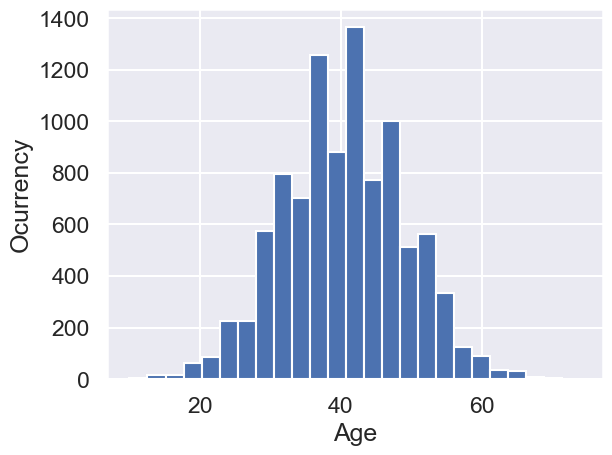

In [40]:
plt.hist(df['age'], bins=25)
plt.xlabel('Age')
plt.ylabel('Ocurrency')
f1 = plt.gcf()

In [41]:
assert f1.gca().has_data()

# If you fail this test, you didn't use 25 bins for your histogram.
assert len(f1.gca().patches) == 25

In [42]:
'''
Question 3b: By looking at the plot, what is the approximate average (mean) age of the individuals in df? 
Round the value to the closest year. Store the answer in the variable average_age
'''

'\nQuestion 3b: By looking at the plot, what is the approximate average (mean) age of the individuals in df? \nRound the value to the closest year. Store the answer in the variable average_age\n'

In [43]:
average_age = 40

In [44]:
assert isinstance(average_age, int)

In [45]:
'''
Question 3c: Plot a histogram of the steps column with 25 bins.
'''

'\nQuestion 3c: Plot a histogram of the steps column with 25 bins.\n'

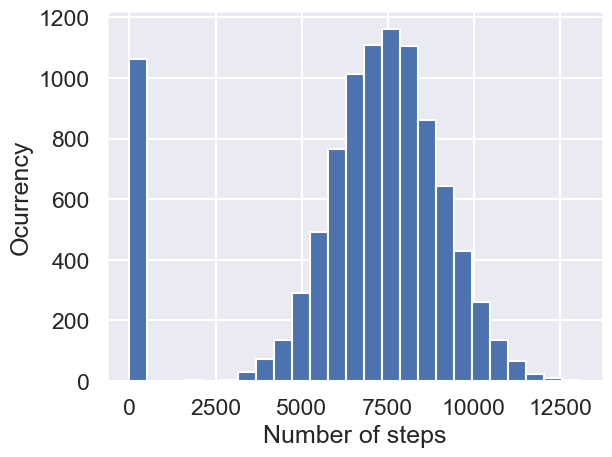

In [46]:
plt.hist(df['steps'], bins=25)
plt.xlabel('Number of steps')
plt.ylabel('Ocurrency')
f2 = plt.gcf()

In [47]:
assert f2.gca().has_data()

In [48]:
'''
Question 3d: By looking at the plot you just generated, approximately how many people in df do the data suggest took no steps? 
Store the letter that best corresponds to your answer in the variable no_steps. 
(For example, if you thought the answer was A) 0, your response would be no_steps = 'A'.

A) 0

B) 100

C) 1000

D) 10000
'''

"\nQuestion 3d: By looking at the plot you just generated, approximately how many people in df do the data suggest took no steps? \nStore the letter that best corresponds to your answer in the variable no_steps. \n(For example, if you thought the answer was A) 0, your response would be no_steps = 'A'.\n\nA) 0\n\nB) 100\n\nC) 1000\n\nD) 10000\n"

In [49]:
no_steps = 'C'

In [50]:
assert isinstance(no_steps, str)

In [51]:
'''
Question 3e: Plot a histogram of the income column with 25 bins.
'''

'\nQuestion 3e: Plot a histogram of the income column with 25 bins.\n'

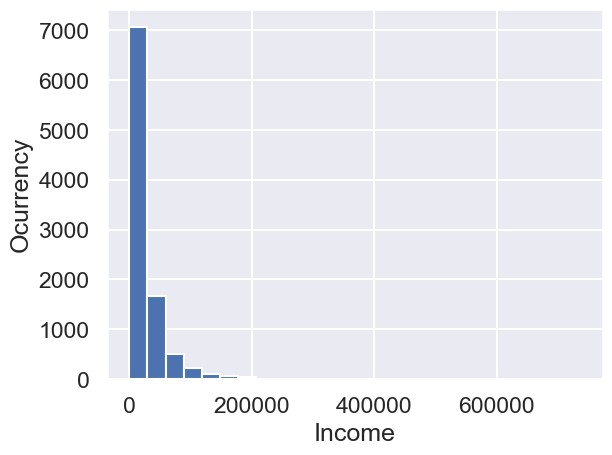

In [52]:
plt.hist(df['income'], bins=25)
plt.xlabel('Income')
plt.ylabel('Ocurrency')
f3 = plt.gcf()

In [53]:
assert f3.gca().has_data()

In [54]:
'''
Question 3f Which of the following statements is true about the income of the individuals included in df? 
Store the letter corresponding to your answer in the variable income_plot. 
(Note: Be sure to consider the bin size of the x-axis when interpreting the plot.)

A) Most people in df had no income in 2018

B) Most people in df made a six figure salary in 2018

C) Most people in df made a salary of more than 200000 USD in 2018

D) A few people in df made a lot more money than the typical person in df
'''

'\nQuestion 3f Which of the following statements is true about the income of the individuals included in df? \nStore the letter corresponding to your answer in the variable income_plot. \n(Note: Be sure to consider the bin size of the x-axis when interpreting the plot.)\n\nA) Most people in df had no income in 2018\n\nB) Most people in df made a six figure salary in 2018\n\nC) Most people in df made a salary of more than 200000 USD in 2018\n\nD) A few people in df made a lot more money than the typical person in df\n'

In [55]:
income_plot = 'D'

In [56]:
assert isinstance(income_plot, str)

In [57]:
'''
Question 3g: Plot the data using the pandas scatter_matrix function. Only plot the age, steps, and income columns.

Note: Including the parameter: figsize = (8, 6) will increase the size of the plot for easier viewing
'''

'\nQuestion 3g: Plot the data using the pandas scatter_matrix function. Only plot the age, steps, and income columns.\n\nNote: Including the parameter: figsize = (8, 6) will increase the size of the plot for easier viewing\n'

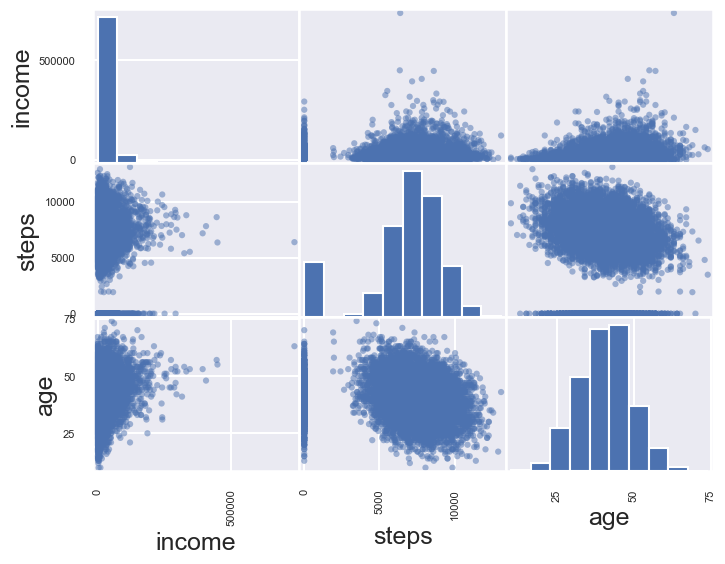

In [58]:
pd.plotting.scatter_matrix(df[['income', 'steps', 'age']], figsize = (8, 6))
f4 = plt.gcf()

In [59]:
assert f4.gca().has_data()

In [60]:
'''
Question 3h: By looking at the plot matrix you just generated, deteremine the approximate age of the wealthiest person in df. 
Store this value (to the nearest year) in the variable wealthy_age.
'''

'\nQuestion 3h: By looking at the plot matrix you just generated, deteremine the approximate age of the wealthiest person in df. \nStore this value (to the nearest year) in the variable wealthy_age.\n'

In [61]:
wealthy_age = 50

In [62]:
assert isinstance(wealthy_age, int)

In [63]:
'''
Part 4: Data Pre-Processing (1.45 points)
In the above sections, we performed basic data cleaning and visualization.

In practice, these two components of an analysis pipeline are often combined into an iterative approach. 
We go back and forth between looking at the data, checking for issues, and cleaning the data.

Let’s continue with an iterative procedure of data cleaning and visualization, addressing some issues that we notice 
after visualizing the data.

Question 4a: In the visualization of the steps column, we notice a large number of -1 values. 
Count how many rows in df have -1 in their steps column. Store the result in the variable n_neg.
'''

'\nPart 4: Data Pre-Processing (1.45 points)\nIn the above sections, we performed basic data cleaning and visualization.\n\nIn practice, these two components of an analysis pipeline are often combined into an iterative approach. \nWe go back and forth between looking at the data, checking for issues, and cleaning the data.\n\nLet’s continue with an iterative procedure of data cleaning and visualization, addressing some issues that we notice \nafter visualizing the data.\n\nQuestion 4a: In the visualization of the steps column, we notice a large number of -1 values. \nCount how many rows in df have -1 in their steps column. Store the result in the variable n_neg.\n'

In [64]:
df1 = df.loc[df['steps'] == -1]
n_neg = len(df1)

In [65]:
assert(n_neg)
assert n_neg > 100

In [66]:
'''
Question 4b: Since it’s impossible to walk a negative number of steps, we will treat the negative values as missing data. 
Drop the rows with negative steps from df. Your answer should modify df itself.
'''

'\nQuestion 4b: Since it’s impossible to walk a negative number of steps, we will treat the negative values as missing data. \nDrop the rows with negative steps from df. Your answer should modify df itself.\n'

In [67]:
df = df.loc[df['steps'] != -1]

In [68]:
assert sum(df['steps'] == -1) == 0

In [69]:
'''
You may have noticed that the values in income are not normally distributed which can hurt prediction ability in some scenarios. 
To address this, we will perform a log transformation on the income values.

First though, we will have to deal with any income values that are 0. Note that these values are not impossible values 
— they may, for example, represent people who are unemployed. So, we shouldn’t remove these individuals; 
however, when we go to log-transform these data, we can’t (mathematically) have any zero values. 
We’ll replace the zeroes with ones, to allow for log transformation, 
while retaining the fact that these indivduals’ income was lower than others in the dataset.

Question 4c: Add a new column to df called income10. 
It should contain the same values as income with all 0 values replaced with 1.

Hint: There is a pandas function replace.
'''

'\nYou may have noticed that the values in income are not normally distributed which can hurt prediction ability in some scenarios. \nTo address this, we will perform a log transformation on the income values.\n\nFirst though, we will have to deal with any income values that are 0. Note that these values are not impossible values \n— they may, for example, represent people who are unemployed. So, we shouldn’t remove these individuals; \nhowever, when we go to log-transform these data, we can’t (mathematically) have any zero values. \nWe’ll replace the zeroes with ones, to allow for log transformation, \nwhile retaining the fact that these indivduals’ income was lower than others in the dataset.\n\nQuestion 4c: Add a new column to df called income10. \nIt should contain the same values as income with all 0 values replaced with 1.\n\nHint: There is a pandas function replace.\n'

In [70]:
df['income10'] = df['income']
df['income10'].replace(to_replace=0.00, value=1, inplace=True)
df

/var/folders/95/4vh4zhc1273fgmfs4wyntxn00000gn/T/ipykernel_95111/3278293682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income10'] = df['income']
/var/folders/95/4vh4zhc1273fgmfs4wyntxn00000gn/T/ipykernel_95111/3278293682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income10'].replace(to_replace=0.00, value=1, inplace=True)


,id,age,steps,income,income10
0,84764,41,8622,99807.16,99807.16
1,49337,31,9870,0.00,1.00
3,98170,34,6987,18077.78,18077.78
...,...,...,...,...,...
10132,68473,40,7895,7617.27,7617.27
10133,60486,49,6004,34479.99,34479.99
10134,13915,39,7180,12133.79,12133.79


In [71]:
assert list(df.columns) == ['id', 'age', 'steps', 'income', 'income10']
assert not any(df['income10'] == 0)

In [72]:
'''
Question 4d: Now, transform the income10 column using a log-base-10 transform.
That is, replace each value in income10 with the log10 of that value.

Note: Be sure you underestand the difference between np.log and np.log10
'''

'\nQuestion 4d: Now, transform the income10 column using a log-base-10 transform.\nThat is, replace each value in income10 with the log10 of that value.\n\nNote: Be sure you underestand the difference between np.log and np.log10\n'

In [73]:
df['income10'] = np.log10(df['income10'])

/var/folders/95/4vh4zhc1273fgmfs4wyntxn00000gn/T/ipykernel_95111/51551250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income10'] = np.log10(df['income10'])


In [74]:
assert np.isclose(min(df['income10']), 0.0, 0.001)
assert np.isclose(max(df['income10']), 5.867, 0.001)

In [75]:
'''
Question 4e: Now, make a histogram for income10 data after the data transformation. Again, use 25 bins.
'''

'\nQuestion 4e: Now, make a histogram for income10 data after the data transformation. Again, use 25 bins.\n'

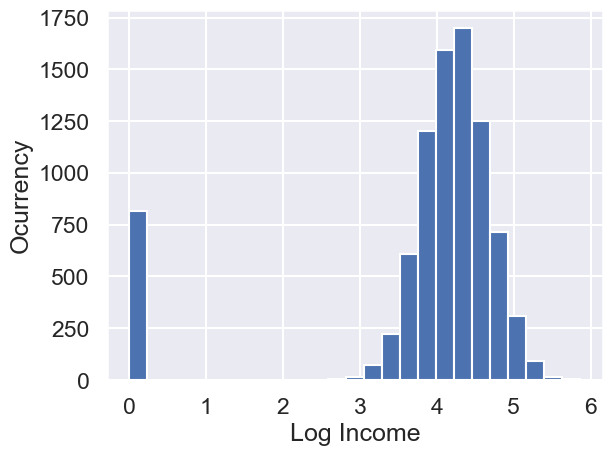

In [76]:
plt.hist(df['income10'], bins=25)
plt.xlabel('Log Income')
plt.ylabel('Ocurrency')

f4 = plt.gcf()

In [77]:
assert f4.gca().has_data()

# If you fail this test, you didn't use 25 bins for your histogram.
assert len(f4.gca().patches) == 25

In [78]:
'''
Question 4f: From this plot, determine approximately how many individuals in df had a reported income of 0. 
Store this value in the variable income_zero.
'''

'\nQuestion 4f: From this plot, determine approximately how many individuals in df had a reported income of 0. \nStore this value in the variable income_zero.\n'

In [79]:
income_zero = 800

In [80]:
assert isinstance(income_zero, int)

In [81]:
'''
Question 4g: We might also have certain regulations or restrictions that we need to follow about the data. 
Here, we will only analyze adults. Remove all rows from df where age is less than 18.
'''

'\nQuestion 4g: We might also have certain regulations or restrictions that we need to follow about the data. \nHere, we will only analyze adults. Remove all rows from df where age is less than 18.\n'

In [82]:
df = df.loc[df['age']>=18]
df

,id,age,steps,income,income10
0,84764,41,8622,99807.16,5.00
1,49337,31,9870,0.00,0.00
3,98170,34,6987,18077.78,4.26
...,...,...,...,...,...
10132,68473,40,7895,7617.27,3.88
10133,60486,49,6004,34479.99,4.54
10134,13915,39,7180,12133.79,4.08


In [83]:
assert min(df['age']) >= 18
assert len(df) == 8590

In [84]:
'''
Part 5 - Basic Analyses (1.1 points)
Now that we have wrangled and cleaned our data, we can start doing some simple analyses.

Here we will explore some basic descriptive summaries of our data, look into the inter-relations (correlations) 
between variables, and ask some simple questions about potentially interesting subsets of our data.

Question 5a: Use the describe pandas method to check a descriptive summary of the data. 
Save the DataFrame generated by describe to a new variable called desc.
'''

'\nPart 5 - Basic Analyses (1.1 points)\nNow that we have wrangled and cleaned our data, we can start doing some simple analyses.\n\nHere we will explore some basic descriptive summaries of our data, look into the inter-relations (correlations) \nbetween variables, and ask some simple questions about potentially interesting subsets of our data.\n\nQuestion 5a: Use the describe pandas method to check a descriptive summary of the data. \nSave the DataFrame generated by describe to a new variable called desc.\n'

In [85]:
desc = df.describe()

In [86]:
assert isinstance(desc, pd.DataFrame)

In [87]:
'''
Question 5b: Calculate the pairwise correlations between all variables.

Note: do this with a pandas method. Keep all columns (including ID). 
Assign the result (which should be a DataFrame) to a variable called corrs.
'''

'\nQuestion 5b: Calculate the pairwise correlations between all variables.\n\nNote: do this with a pandas method. Keep all columns (including ID). \nAssign the result (which should be a DataFrame) to a variable called corrs.\n'

In [88]:
corrs = df.corr()
corrs

,id,age,steps,income,income10
id,1.00e+00,-4.26e-03,2.28e-03,-0.03,-0.01
age,-4.26e-03,1.00e+00,-2.81e-01,0.27,0.10
steps,2.28e-03,-2.81e-01,1.00e+00,0.05,0.03
income,-2.57e-02,2.70e-01,4.85e-02,1.00,0.47
income10,-1.23e-02,1.03e-01,2.52e-02,0.47,1.00


In [89]:
assert isinstance(corrs, pd.DataFrame)
assert corrs.shape == (5, 5)

In [90]:
'''
Question 5c: Answer the following questions by setting your answer variables to either 'age', 'steps', or 'income'.

Which variable is most correlated with age (aside from age itself)? Record your answer in a variable called age_corr.

Which variable is most correlated with income (aside from income and income10)? Record your answer in a variable called inc_corr.
'''

"\nQuestion 5c: Answer the following questions by setting your answer variables to either 'age', 'steps', or 'income'.\n\nWhich variable is most correlated with age (aside from age itself)? Record your answer in a variable called age_corr.\n\nWhich variable is most correlated with income (aside from income and income10)? Record your answer in a variable called inc_corr.\n"

In [91]:
corrs1 = corrs.loc[corrs['age'] != 1]
age_corr = corrs1[corrs1['age'] == corrs1['age'].max()].index.tolist()
age_corr = age_corr[0]

In [92]:
assert age_corr
assert age_corr in {'steps', 'age', 'income'}

In [93]:
corrs2 = corrs.loc[corrs['income'] != 1].drop('income10')
inc_corr = corrs2[corrs2['income'] == corrs2['income'].max()].index.tolist()
inc_corr = inc_corr[0]

In [94]:
assert inc_corr
assert inc_corr in {'steps', 'age', 'income'}

In [95]:
'''
Question 5d: How many steps would you have to walk to be in the top 10% of walkers? 
Save your answer as a variable called top_walker.

Hint: check out the quantile method.
'''

'\nQuestion 5d: How many steps would you have to walk to be in the top 10% of walkers? \nSave your answer as a variable called top_walker.\n\nHint: check out the quantile method.\n'

In [96]:
top_walker = df.quantile(q=0.1)['steps']

In [97]:
assert top_walker
assert isinstance(top_walker, float)

In [98]:
'''
Question 5e: What is the average income for people over the age of 65? Save your response in a variable called old_income.

Note: We’re asking for the actual income, not the log-10 of income.
'''

'\nQuestion 5e: What is the average income for people over the age of 65? Save your response in a variable called old_income.\n\nNote: We’re asking for the actual income, not the log-10 of income.\n'

In [99]:
old_income = df['income'].mean()

In [100]:
assert old_income
assert old_income > 5

In [101]:
'''
Part 6 - Predictions (1.7 points)
Many analyses ask predictive questions in which data we have currently are used to build a model 
to predict something about the future (data we do not yet have).

Here we will explore some basic predictions, looking into whether we might be able to predict income from our other variables.

Note: You will use the np.polyfit function from NumPy as we did in Tutorials/02-DataAnalysis.

Question 6a: Use polyfit to fit a 1-degree linear model, predicting income from age. Call the output parameters a1 and b1.
'''

'\nPart 6 - Predictions (1.7 points)\nMany analyses ask predictive questions in which data we have currently are used to build a model \nto predict something about the future (data we do not yet have).\n\nHere we will explore some basic predictions, looking into whether we might be able to predict income from our other variables.\n\nNote: You will use the np.polyfit function from NumPy as we did in Tutorials/02-DataAnalysis.\n\nQuestion 6a: Use polyfit to fit a 1-degree linear model, predicting income from age. Call the output parameters a1 and b1.\n'

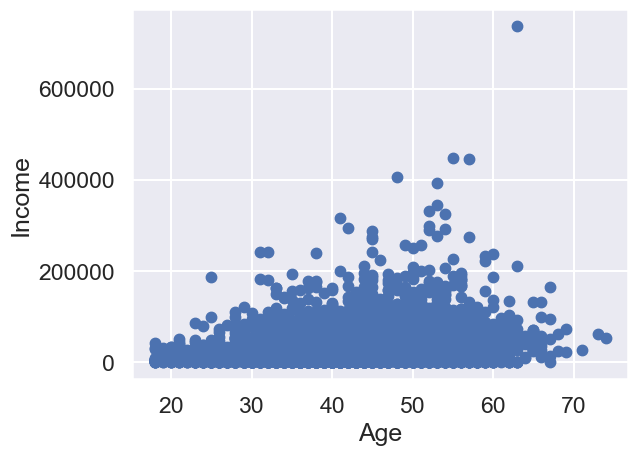

In [134]:
# Visualize data
fig, ax = plt.subplots()
ax.plot(df['age'], df['income'], '.', ms=15)
ax.set(xlabel='Age', ylabel='Income')
f5 = plt.gcf()

In [107]:
a1, b1 = np.polyfit(df['age'], df['income'], 1)
print(a1)
print(b1)

1059.1700353048434
-17422.7660622951


In [108]:
assert(a1)
assert(b1)

# If you fail these tests, your parameter values are quite far from what they
# should be.
assert abs(a1) > 100
assert abs(b1) > 100

In [109]:
'''
Question 6b: Use the model parameters from 6a to predict the income of a 75-year-old. Call your prediction pred_75.
'''

'\nQuestion 6b: Use the model parameters from 6a to predict the income of a 75-year-old. Call your prediction pred_75.\n'

In [111]:
pred_75 = a1 * 75 + b1
print(pred_75)

62014.98658556815


In [112]:
assert(pred_75)

In [113]:
'''
Question 6c: Use polyfit once more to fit a 1-degree linear model, predicting income from steps. 
Call the output parameters a2 and b2.
'''

'\nQuestion 6c: Use polyfit once more to fit a 1-degree linear model, predicting income from steps. \nCall the output parameters a2 and b2.\n'

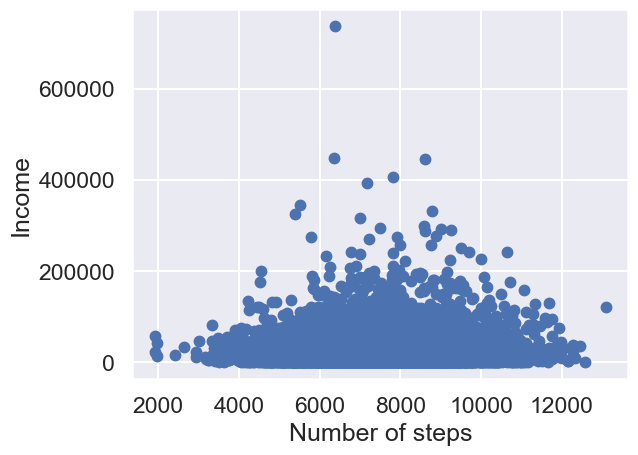

In [133]:
# Visualize data
fig, ax = plt.subplots()
ax.plot(df['steps'], df['income'], '.', ms=15)
ax.set(xlabel='Number of steps', ylabel='Income')
f5 = plt.gcf()

In [115]:
a2, b2 = np.polyfit(df['steps'], df['income'], 1)
print(a2)
print(b2)

1.0678122463676694
17528.724932785855


In [116]:
assert(a2)
assert(b2)

# If you fail these tests, your parameter values are quite far from what they
# should be.
assert abs(a2) < 100
assert abs(b2) > 100

In [117]:
'''
Question 6d: Predict the income of someone who took 10,000 steps. Call your prediction pred_10k.
'''

'\nQuestion 6d: Predict the income of someone who took 10,000 steps. Call your prediction pred_10k.\n'

In [118]:
pred_10k = a2 * 10000 + b2
print(pred_10k)

28206.84739646255


In [119]:
assert(pred_10k)

In [120]:
'''
Question 6e: To better understand a model, we can visualize its predictions. 
Use your first model to predict income from each integer age in between 18 and 80. 
Your predictions should be stored in a numpy array of floats called pred_age.

Reminder: numpy has the arange function
'''

'\nQuestion 6e: To better understand a model, we can visualize its predictions. \nUse your first model to predict income from each integer age in between 18 and 80. \nYour predictions should be stored in a numpy array of floats called pred_age.\n\nReminder: numpy has the arange function\n'

In [125]:
pred_age = np.array([a1 * age + b1 for age in range(18, 81)])
print(pred_age)

[ 1642.29457319  2701.4646085   3760.6346438   4819.80467911
  5878.97471441  6938.14474972  7997.31478502  9056.48482033
 10115.65485563 11174.82489094 12233.99492624 13293.16496155
 14352.33499685 15411.50503216 16470.67506746 17529.84510276
 18589.01513807 19648.18517337 20707.35520868 21766.52524398
 22825.69527929 23884.86531459 24944.0353499  26003.2053852
 27062.37542051 28121.54545581 29180.71549112 30239.88552642
 31299.05556173 32358.22559703 33417.39563234 34476.56566764
 35535.73570295 36594.90573825 37654.07577356 38713.24580886
 39772.41584417 40831.58587947 41890.75591478 42949.92595008
 44009.09598539 45068.26602069 46127.436056   47186.6060913
 48245.77612661 49304.94616191 50364.11619721 51423.28623252
 52482.45626782 53541.62630313 54600.79633843 55659.96637374
 56719.13640904 57778.30644435 58837.47647965 59896.64651496
 60955.81655026 62014.98658557 63074.15662087 64133.32665618
 65192.49669148 66251.66672679 67310.83676209]


In [126]:
assert isinstance(pred_age, np.ndarray)
assert len(pred_age) == 63

# Your array should contain decimals, not integers
assert isinstance(pred_age[0], float)

In [127]:
'''
Question 6f: Make a scatter plot with income on the y-axis and age on the x-axis. 
Then, draw your predictions as a red line on top of the scatter plot. 
The data in your plot and your line should look like this (although the exact colors/dimensions/appearance may differ a bit):
'''

'\nQuestion 6f: Make a scatter plot with income on the y-axis and age on the x-axis. \nThen, draw your predictions as a red line on top of the scatter plot. \nThe data in your plot and your line should look like this (although the exact colors/dimensions/appearance may differ a bit):\n'

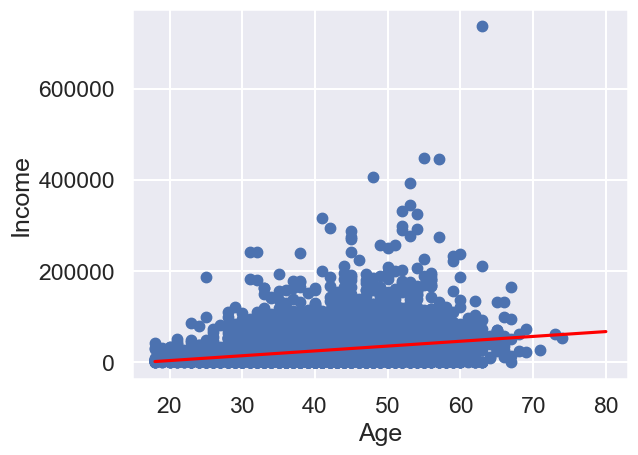

In [142]:
fig, ax = plt.subplots()
ax.plot(df['age'], df['income'], '.', ms = 15)
ax.set(xlabel = 'Age', ylabel = 'Income')
ax.plot(range(18, 81), pred_age, '-', color='red', ms = 15)
f5 = plt.gcf()

In [143]:
assert f5.gca().has_data()

In [144]:
'''
Question 6g: Now, let’s do the same for the model that uses steps.

Use your second model to predict income from each multiple of 100 steps in between 2000 and 13000. 
Your predictions should be stored in a numpy array called pred_steps.
'''

'\nQuestion 6g: Now, let’s do the same for the model that uses steps.\n\nUse your second model to predict income from each multiple of 100 steps in between 2000 and 13000. \nYour predictions should be stored in a numpy array called pred_steps.\n'

In [153]:
pred_steps = np.array([a2 * steps + b2 for steps in range(2000, 13001, 100)])

In [152]:
assert isinstance(pred_steps, np.ndarray)
assert len(pred_steps) == 111
# Your array should contain decimals, not integers
assert isinstance(pred_steps[0], float)

In [154]:
'''
Question 6h: Make a scatter plot with income on the y-axis and steps on the x-axis. 
Then, draw your predictions as a red line on top of the scatter plot. Your plot should look like this:
'''

'\nQuestion 6h: Make a scatter plot with income on the y-axis and steps on the x-axis. \nThen, draw your predictions as a red line on top of the scatter plot. Your plot should look like this:\n'

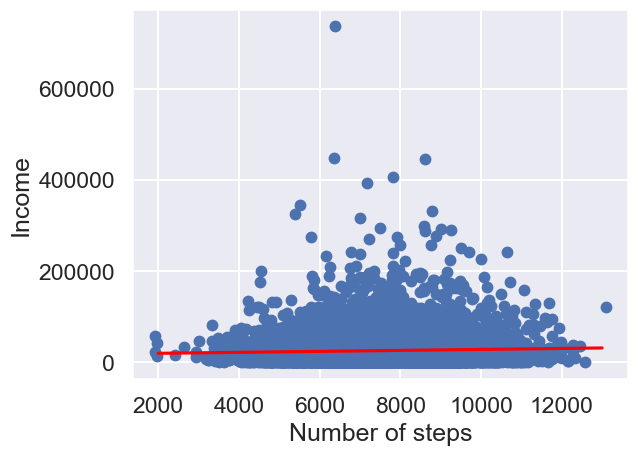

In [161]:
fig, ax = plt.subplots()
ax.plot(df['steps'], df['income'], '.', ms=15)
ax.set(xlabel='Number of steps', ylabel='Income')
ax.plot(range(2000, 13001, 100), pred_steps, '-', color='red', ms=15)
f6 = plt.gcf()

In [158]:
assert f6.gca().has_data()

In [159]:
'''
Question 6i: Notice that both these models perform poorly on this data. 
For this particular dataset, neither age nor steps seem to have a linear relationship with income. 
Nonetheless, fitting a linear model is simple and gives us a baseline to compare with more complex models in the future.

Suppose that you were forced to pick one of the above models. 
Between 'age' and 'steps', which predictor has higher prediction power? Save your response in the variable model_choice.
'''

"\nQuestion 6i: Notice that both these models perform poorly on this data. \nFor this particular dataset, neither age nor steps seem to have a linear relationship with income. \nNonetheless, fitting a linear model is simple and gives us a baseline to compare with more complex models in the future.\n\nSuppose that you were forced to pick one of the above models. \nBetween 'age' and 'steps', which predictor has higher prediction power? Save your response in the variable model_choice.\n"

In [170]:
from scipy.stats import pearsonr, spearmanr
corr = 0.75
covs = [[1, corr], [corr, 1]]
means = [0, 0]
r_age_val, p_age_val = pearsonr(df['age'], df['income'])
r_steps_val, p_steps_val = pearsonr(df['steps'], df['income'])
if r_age_val > r_steps_val:
    model_choice = 'age'
elif r_age_val < r_steps_val:
    model_choice = 'steps'
else:
    model_choice = 'age and steps have equal prediction power'
print(model_choice)

age


In [171]:
assert model_choice
assert model_choice in {'age', 'steps'}